In [52]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

import numpy as np
np.random.seed(0)

In [53]:
train_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
train_iris

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [54]:
test_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
test_iris

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0
125,7.2,3.2,6.0,1.8,2
36,5.5,3.5,1.3,0.2,0
141,6.9,3.1,5.1,2.3,2
12,4.8,3.0,1.4,0.1,0
63,6.1,2.9,4.7,1.4,1


In [55]:
train_iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [56]:
X_train = train_iris.drop(['species'], axis=1)
y_train = train_iris.species

In [57]:
X_test = test_iris.drop(['species'], axis=1)
y_test = test_iris.species

In [61]:
scores_data = pd.DataFrame()
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
    temp_scores_data = pd.DataFrame({'max_depth': [max_depth], 
                                     'score_train': [score_train], 
                                     'score_test': [score_test]
                                    })
    scores_data = pd.concat([scores_data, temp_scores_data], ignore_index=True)

In [62]:
scores_data_long = pd.melt(scores_data, 
                           id_vars = ['max_depth'], 
                           value_vars = ['score_train','score_test'], 
                           var_name = 'set_type', 
                           value_name = 'score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

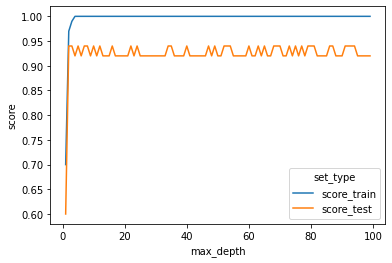

In [63]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)